# LPF

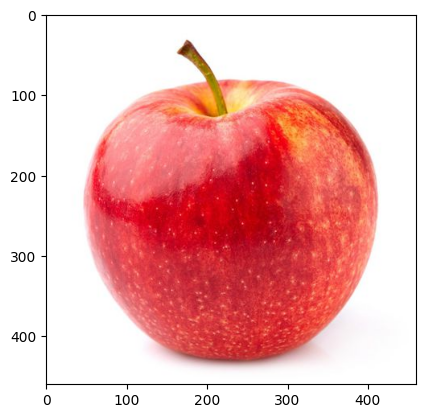

[[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]


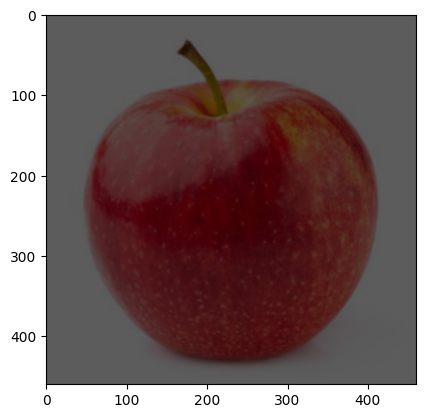

In [1]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika menggunakan Google Colab, jangan lupa load code di bawah ini
# from google.colab.patches import cv2_imshow

# baca gambar
cat = cv2.imread('apple.jpg')

# konversi ke ruang warna RGB
img = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
plt.imshow(img)
plt.show()

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((3,3), np.float32) / 25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(cat, -1, kernel)

kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
# tampilkan gambar hasil filtering
plt.imshow(kucing_filter_bgr)
plt.show()

# salt and pepper

# menampilkan histogram

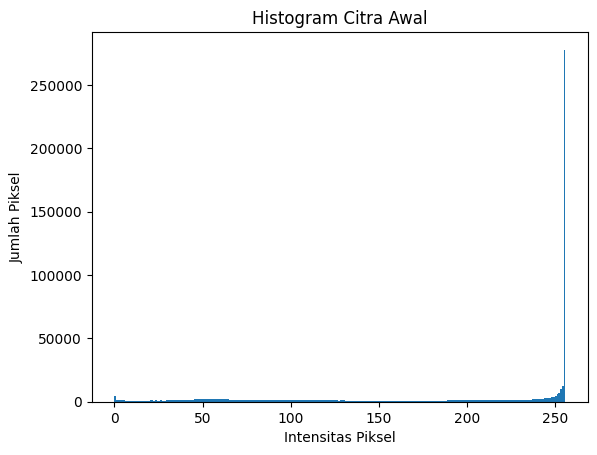

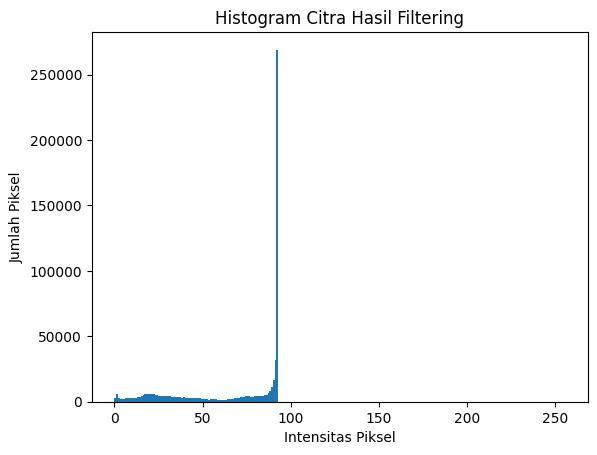

In [2]:
# Histogram citra awal
plt.hist(img.ravel(), 256, [0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Awal')
plt.show()

# Histogram citra hasil filtering
kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
plt.hist(kucing_filter_bgr.ravel(), 256, [0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Hasil Filtering')
plt.show()

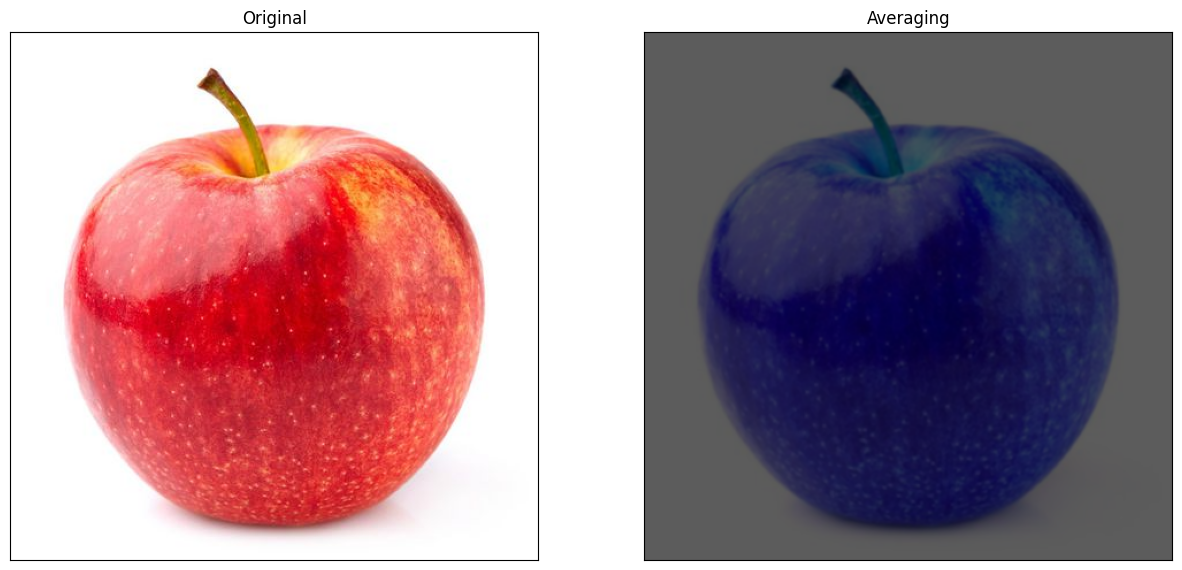

In [3]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

# Menampilkan histogram

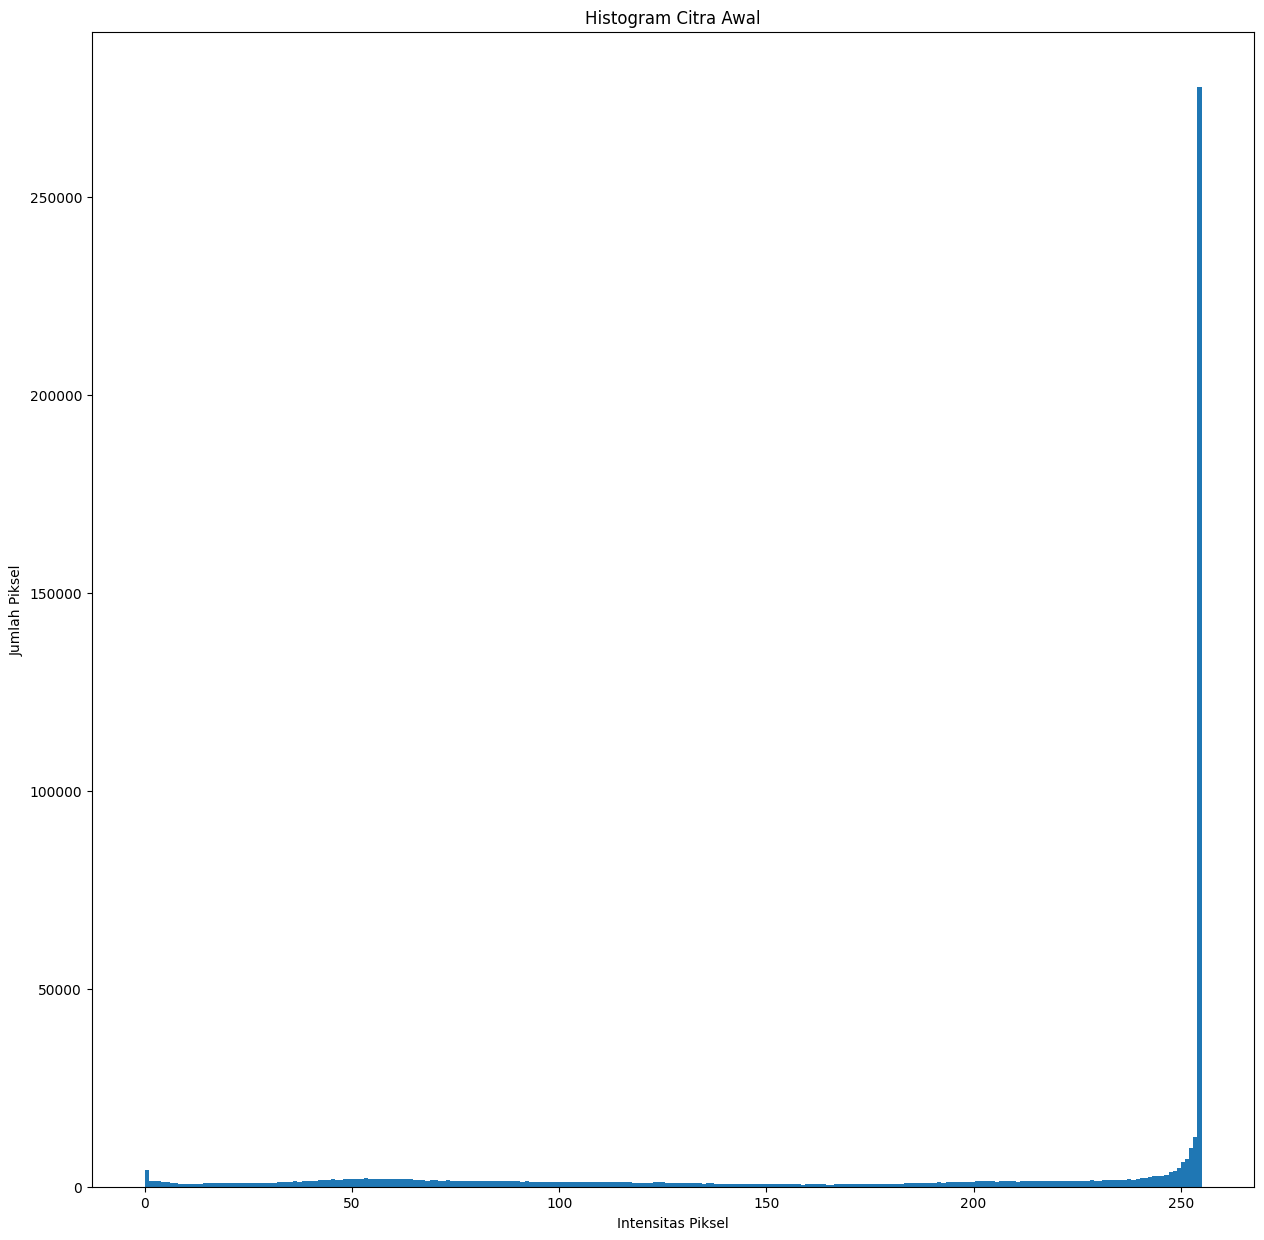

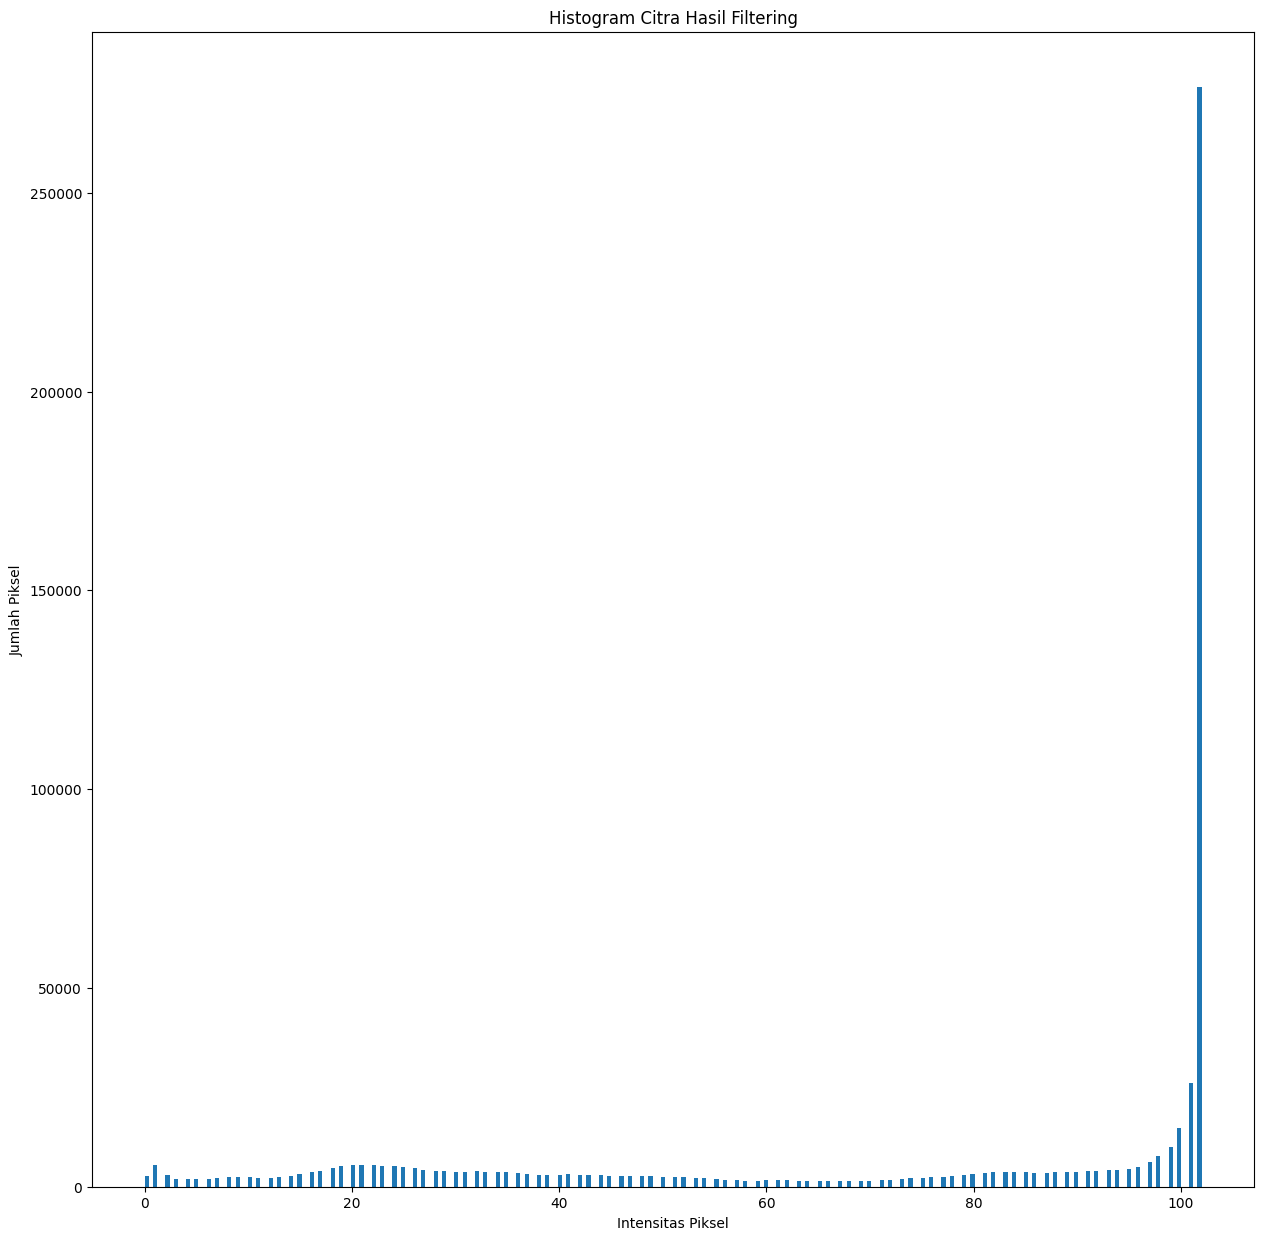

In [12]:
# Histogram citra awal
plt.hist(img.ravel(), bins=256)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Awal')
plt.show()

# Histogram citra hasil filtering
kucing_filter = cv2.filter2D(img, -1, kernel)
plt.hist(kucing_filter.ravel(), bins=256)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Hasil Filtering')
plt.show()

# Pertanyaan 1: Mengapa hasil plotting berubah warnanya? apa yang perlu dilakukan untuk mengkoreksinya?

In [5]:
# jawab
# Dalam kode di atas, saat membaca gambar menggunakan cv2.imread, gambar tersebut disimpan dalam format BGR.
# Kemudian, saat melakukan konversi warna menggunakan cv2.cvtColor dengan parameter cv2.COLOR_BGR2RGB,
# gambar tersebut diubah menjadi format RGB.

# Namun, saat melakukan plotting menggunakan Matplotlib, fungsi plt.imshow mengharapkan masukan dalam format RGB.
# Oleh karena itu, ketika Anda menggunakan plt.imshow untuk menampilkan gambar hasil filtering (kucing_filter),
# yang sebenarnya dalam format BGR, Matplotlib akan menginterpretasikan gambar tersebut sebagai format RGB, 
# sehingga menghasilkan perubahan warna pada plotting.

In [6]:
# yang perlu dilakukan adalah Ubah gambar kembali ke format BGR sebelum melakukan plotting. 
# kita dapat menggunakan fungsi cv2.cvtColor dengan parameter cv2.COLOR_RGB2BGR sebelum memasukkan gambar ke plt.imshow
# kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
# plt.subplot(122), plt.imshow(kucing_filter_bgr), plt.title('Averaging')

# Hasil perbaikan

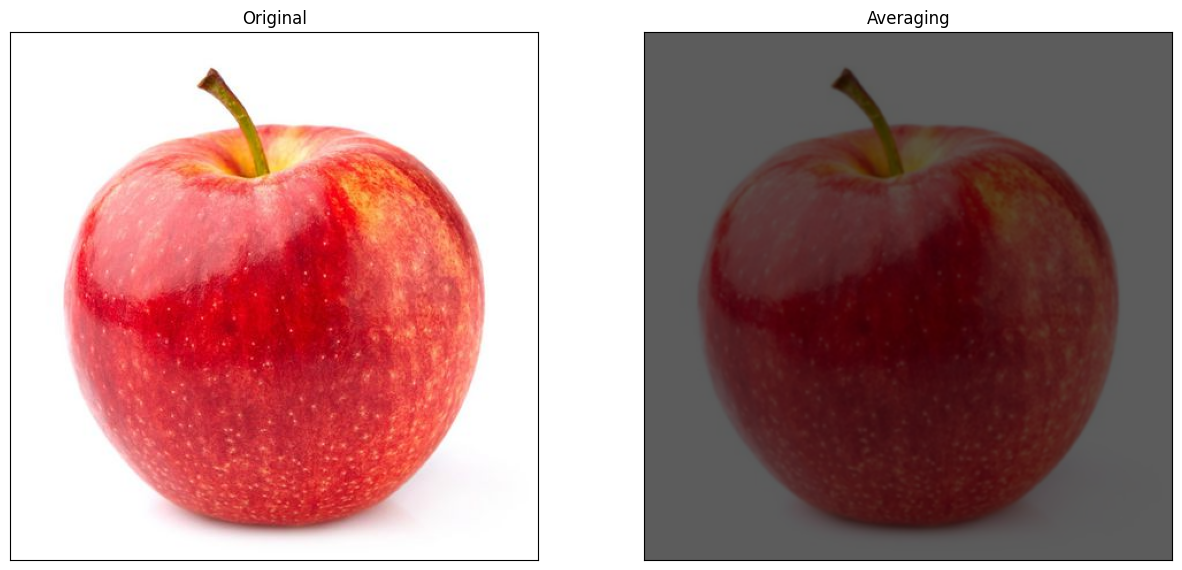

In [7]:
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122), plt.imshow(kucing_filter_bgr), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

# Menampilkan Histogram

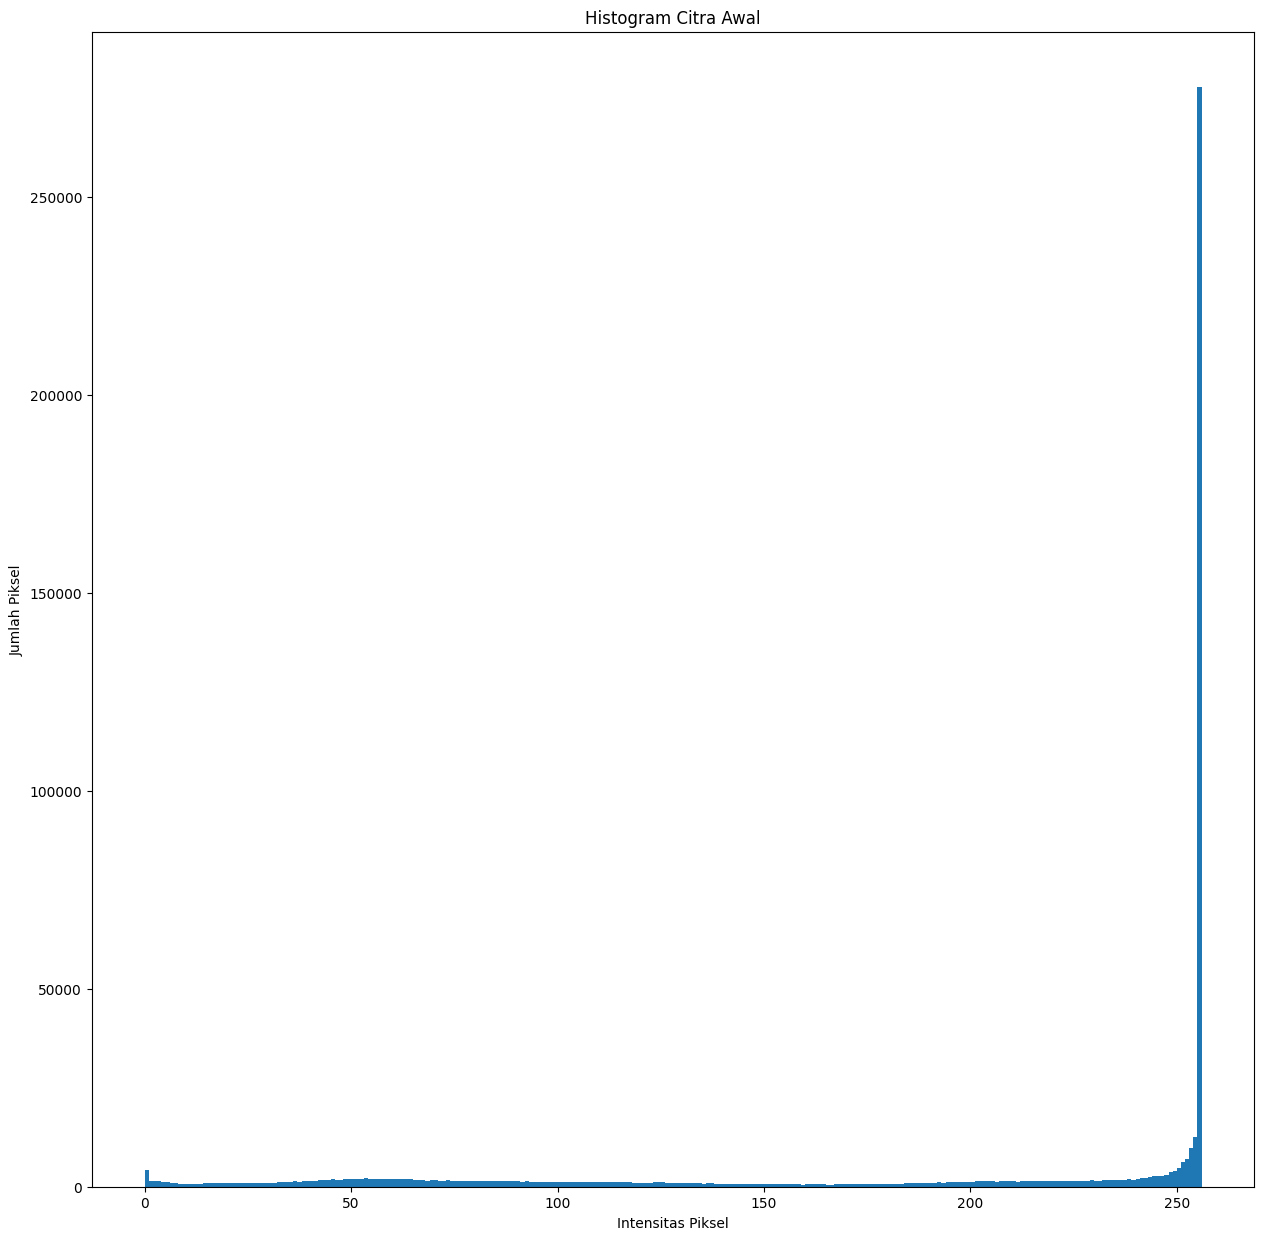

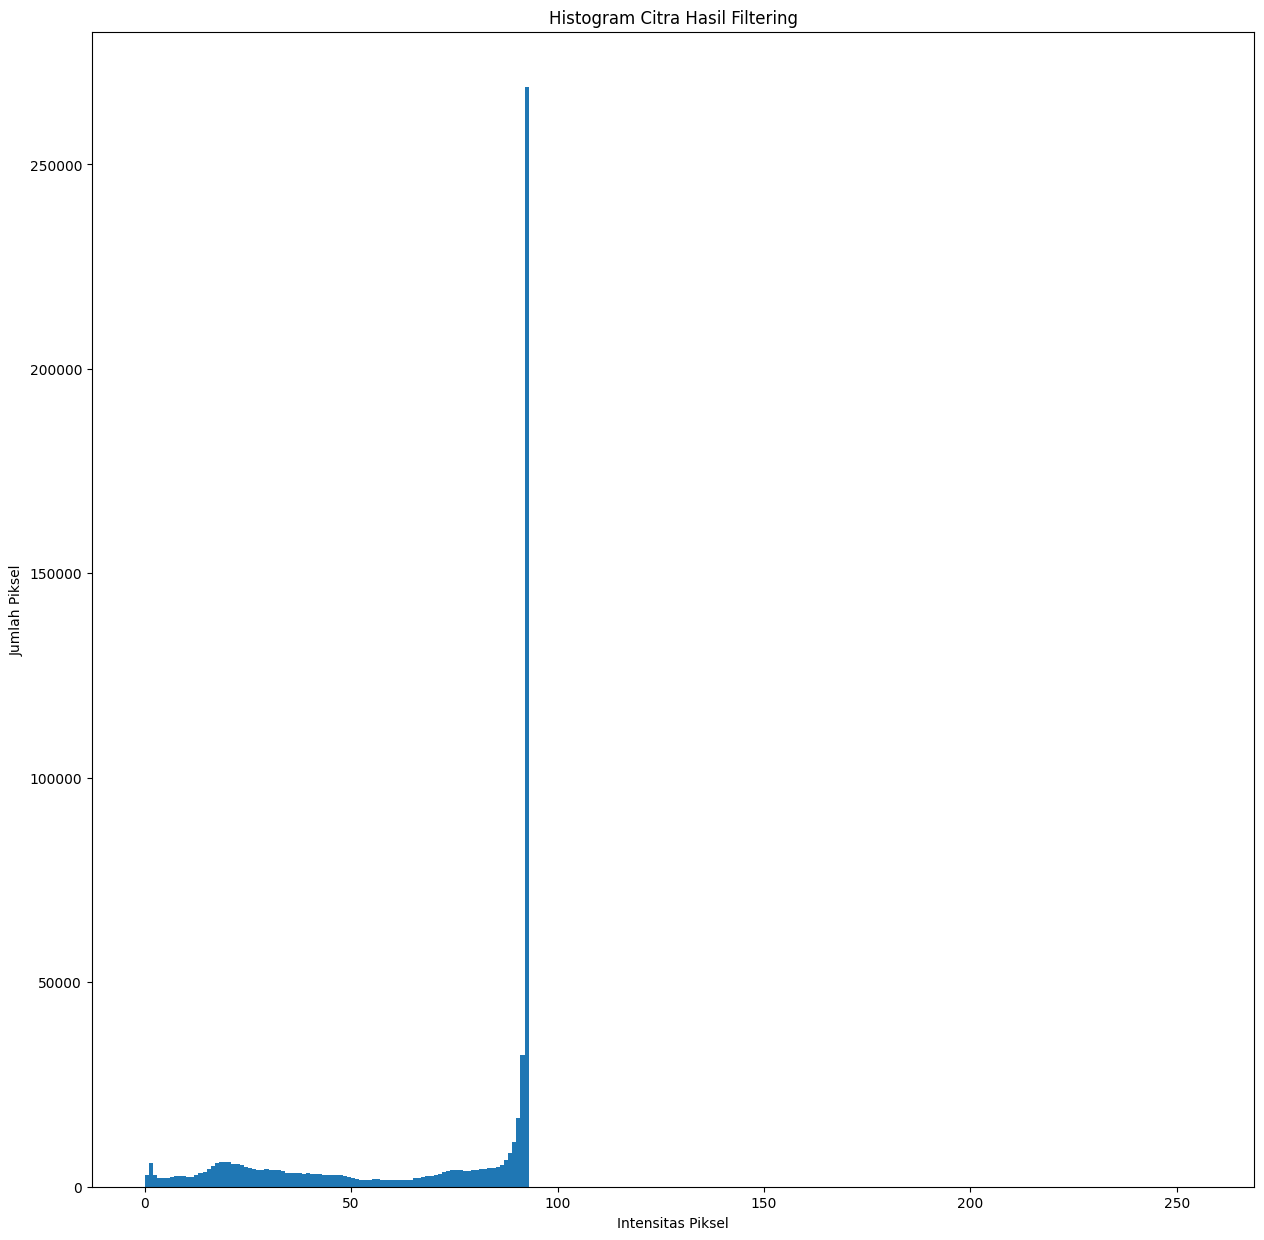

In [8]:
# Histogram citra awal
plt.hist(img.ravel(), 256, [0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Awal')
plt.show()

# Histogram citra hasil filtering
kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
plt.hist(kucing_filter_bgr.ravel(), 256, [0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram Citra Hasil Filtering')
plt.show()

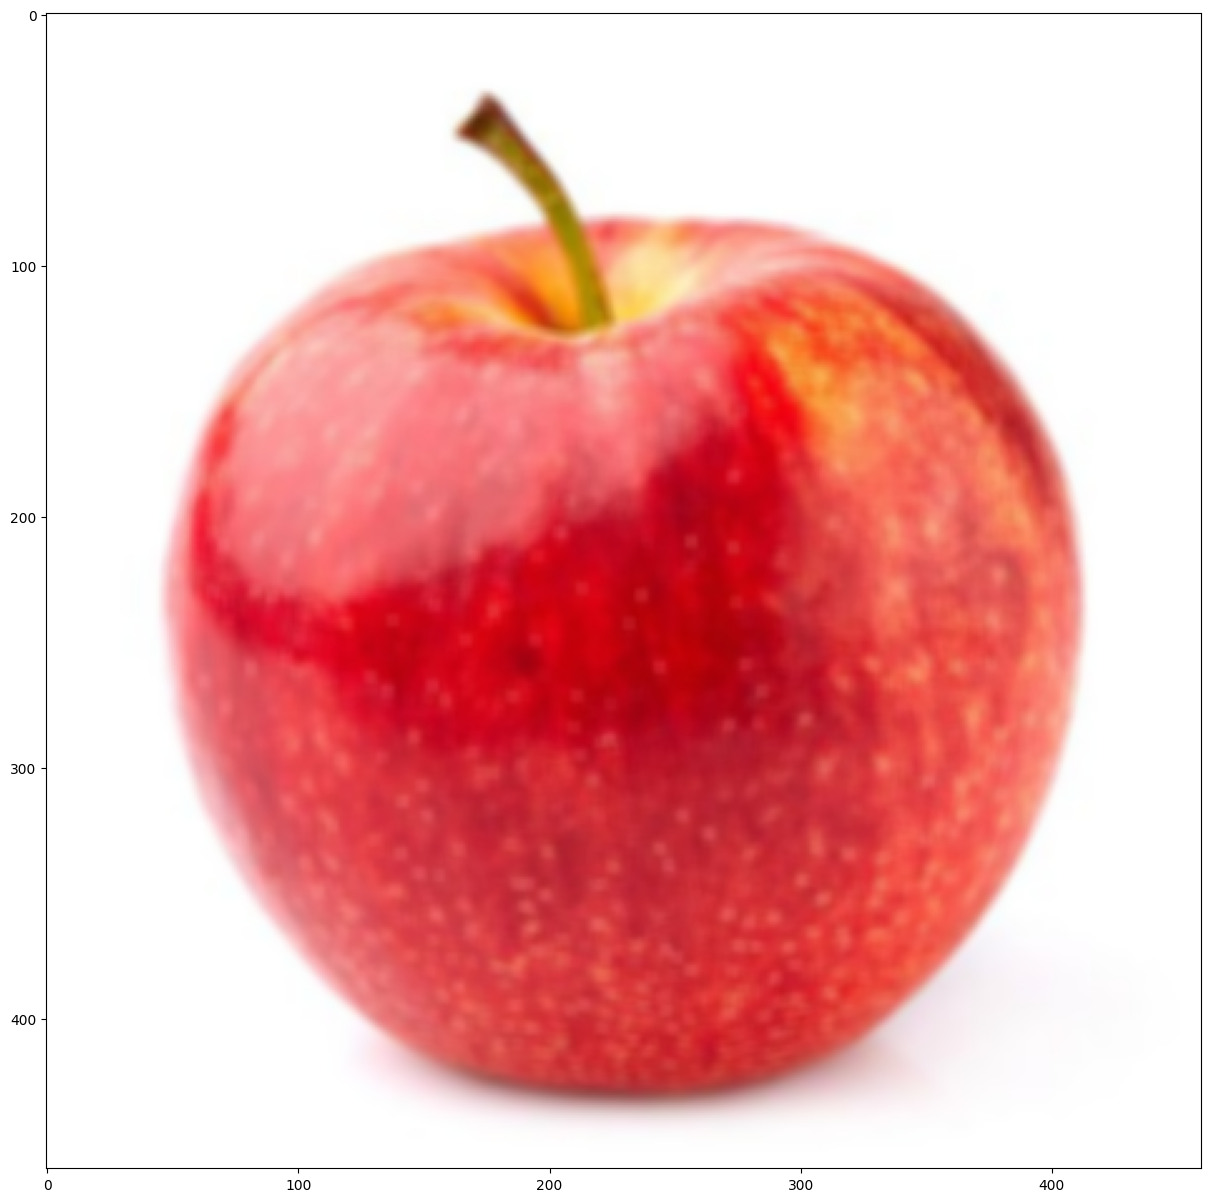

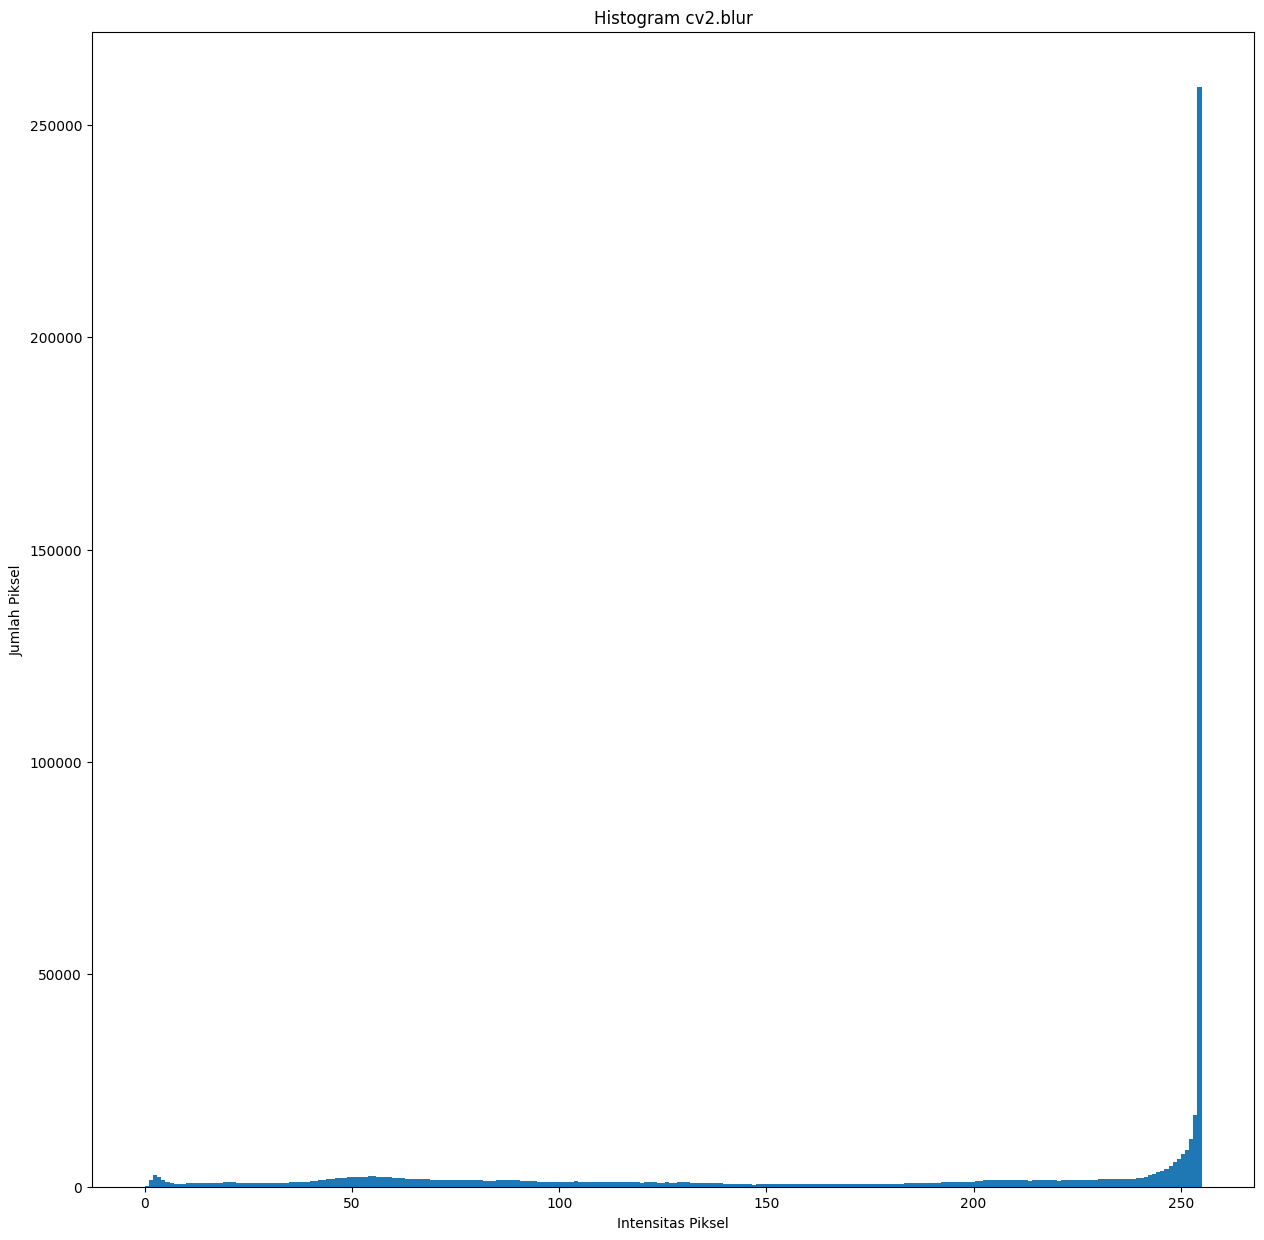

In [9]:
apple_blur = cv2.blur(img,(5,5))

plt.imshow(apple_blur)
plt.show()

# Histogram citra blur
plt.hist(apple_blur.ravel(), bins=256)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram cv2.blur')
plt.show()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


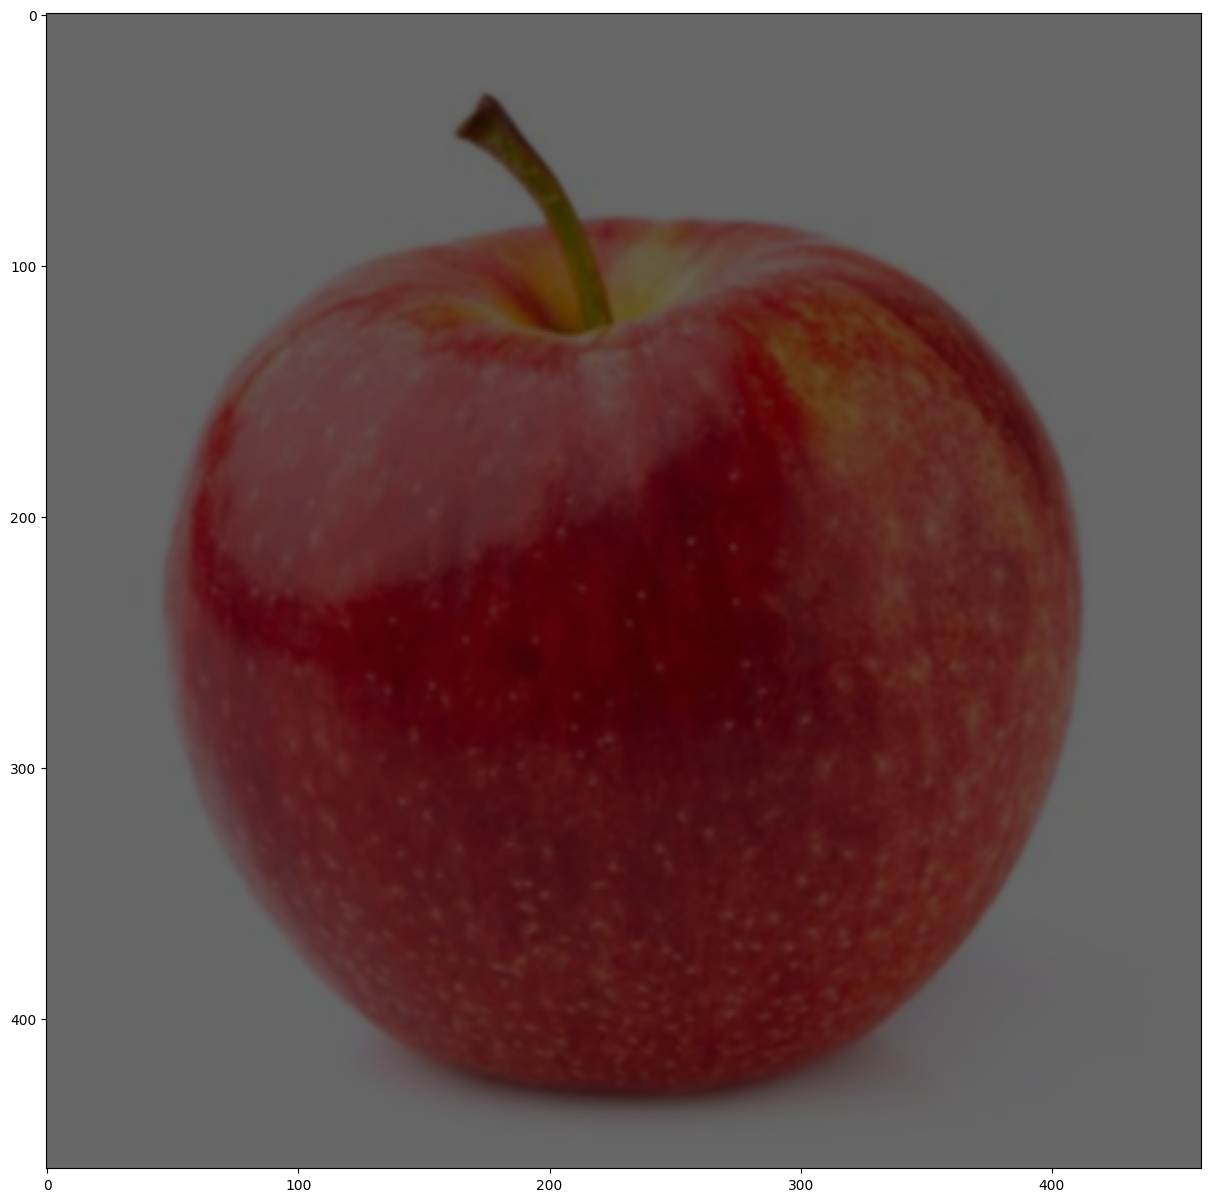

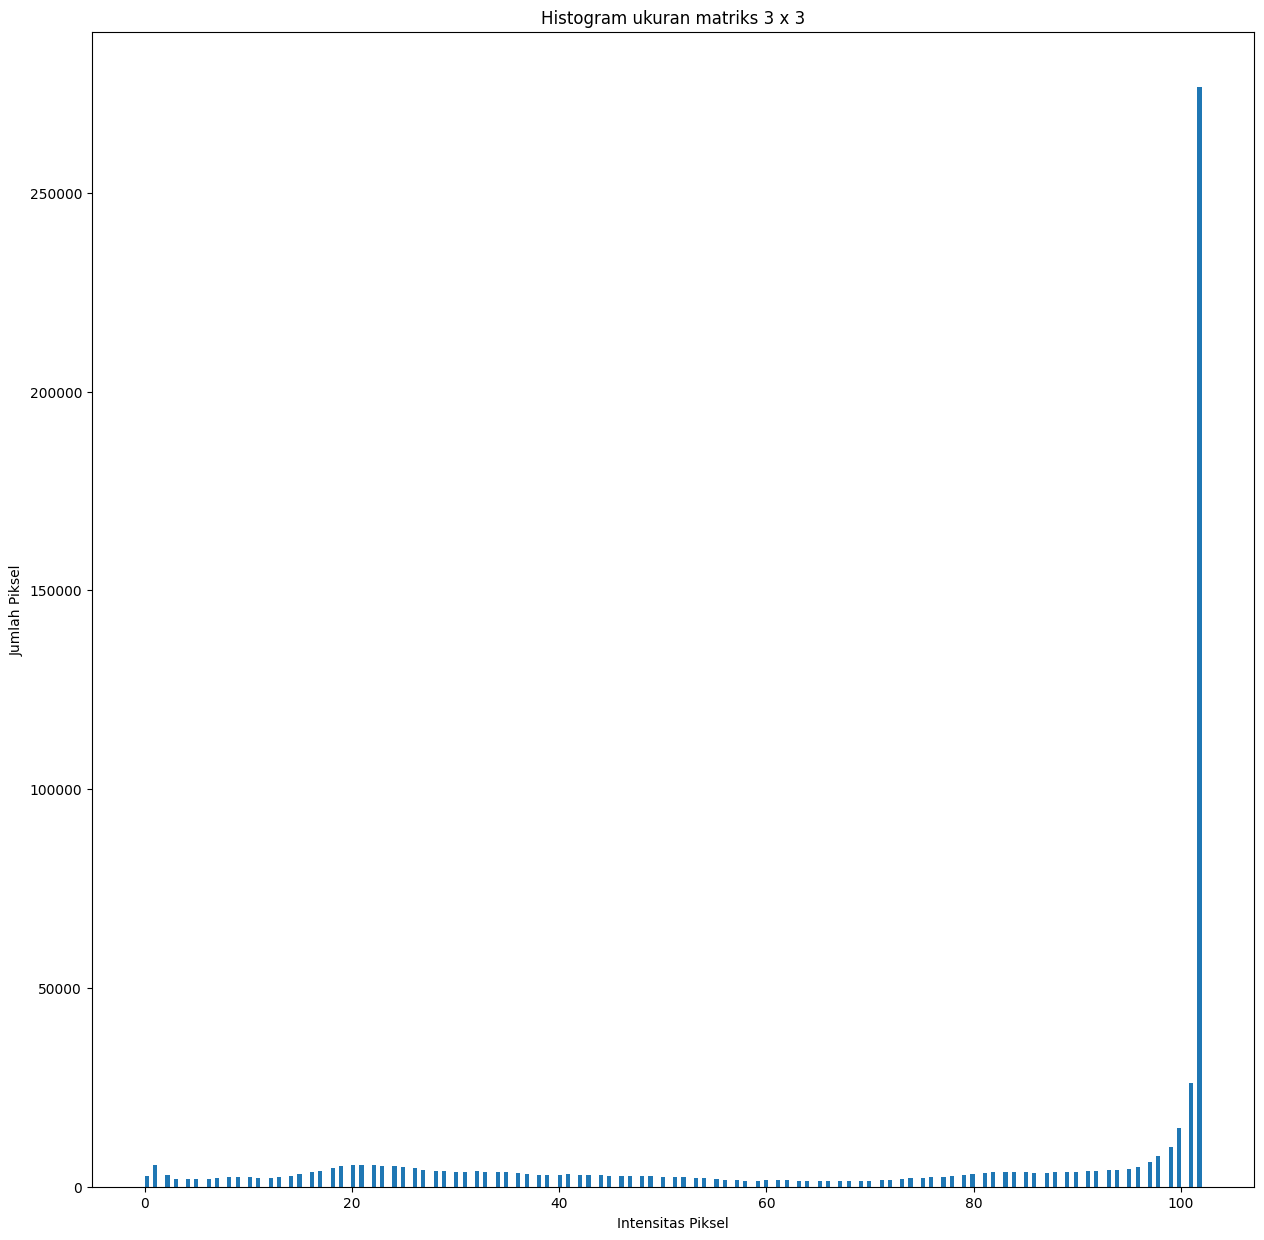

In [10]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(cat,-1,kernel)

kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
# tampilkan gambar hasil filtering
plt.imshow(kucing_filter_bgr)
plt.show()

# Histogram citra blur
plt.hist(kucing_filter_bgr.ravel(), bins=256)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.title('Histogram ukuran matriks 3 x 3')
plt.show()

# Contoh di atas merupakan Averaging Filter. Seperti namanya, kernel pada filter tersebut dibuat agar seluruh piksel yang bertetangga dikurangi nilainya. Kira-kira apa kegunaan dari filter seperti ini? apa pengaruh ukuran filter pada hasil filtering tersebut?

In [11]:
# jawab :
# Averaging filter atau juga dikenal sebagai mean filter adalah salah satu jenis filter spasial yang umum digunakan
# dalam pemrosesan citra. Filter ini memiliki kernel dengan bobot yang sama di setiap elemennya. Kegunaan dari 
# filter ini adalah untuk menghaluskan atau meratakan citra dengan cara mengurangi varian intensitas antara piksel tetangga.

# Beberapa kegunaan dari averaging filter adalah:

#1. Penghalusan citra: Filter ini dapat digunakan untuk mengurangi kebisingan atau noise pada citra. Dengan mengurangi varian intensitas antara piksel tetangga, filter averaging dapat menghaluskan citra dan menghasilkan citra yang lebih rata.

#2. Reduksi detail: Filter ini juga dapat digunakan untuk mengurangi detail atau tekstur pada citra. Dengan mengambil rata-rata intensitas piksel tetangga, filter averaging dapat mengaburkan detail kecil pada citra.

#3. Persiapan untuk operasi lanjutan: Averaging filter sering digunakan sebagai tahap pra-pemrosesan sebelum melakukan operasi lanjutan pada citra, seperti deteksi tepi atau segmentasi. Dengan menghaluskan citra terlebih dahulu, operasi lanjutan dapat memberikan hasil yang lebih baik.

#Pengaruh ukuran filter pada hasil filtering adalah sebagai berikut:

#- Ukuran filter (kernel) yang lebih besar akan menghasilkan efek penghalusan yang lebih kuat pada citra. Hal ini karena dengan menggunakan kernel yang lebih besar, intensitas piksel tetangga yang lebih banyak akan diambil rata-ratanya, sehingga mengurangi varian intensitas secara lebih signifikan.

#- Namun, penggunaan ukuran filter yang terlalu besar juga dapat menyebabkan pengaburan berlebihan atau kehilangan detail yang penting pada citra.

#- Selain itu, ukuran filter yang lebih besar juga dapat menyebabkan penurunan resolusi spasial pada citra. Hal ini terjadi karena dengan menggunakan kernel yang lebih besar, informasi dari piksel tetangga diambil dengan lebih luas, sehingga perbedaan intensitas yang lebih halus dalam citra dapat hilang.

# Oleh karena itu, pemilihan ukuran filter yang tepat perlu mempertimbangkan keseimbangan antara penghalusan yang
# diinginkan dan mempertahankan detail penting pada citra.